# Plot OpenFAST Outputs

In [1]:
# Load all the tools
import numpy as np
# from wisdem.aeroelasticse.CaseLibrary import ROSCO_Test
import os, subprocess

# from weis.aeroelasticse.FAST_reader import InputReader_Common, InputReader_OpenFAST, InputReader_FAST7
# from weis.aeroelasticse.FAST_writer import InputWriter_Common, InputWriter_OpenFAST, InputWriter_FAST7
# from weis.aeroelasticse.runFAST_pywrapper import runFAST_pywrapper_batch
# from weis.aeroelasticse.CaseGen_General import CaseGen_General
# from weis.aeroelasticse.CaseGen_IEC import CaseGen_IEC
# from pCrunch import pdTools
# from pCrunch import Processing, Analysis
# from weis.aeroelasticse.Util import FileTools

# Instantiate fast_IO
from rosco.toolbox.ofTools.fast_io import output_processing

from rosco.toolbox.ofTools.util import spectral


import pandas as pd

import matplotlib.pyplot as plt
# %matplotlib

i_fig = 0

Set outputs

In [13]:
outfiles = [
    # '/Users/dzalkind/Tools/ROSCO3/Examples/examples_out/12_ipc_sim/NREL2p8/ramp/base/NREL2p8_0.out',
    # '/Users/dzalkind/Tools/ROSCO3/Examples/examples_out/12_ipc_sim/NREL2p8/ramp/base/NREL2p8_1.out',
    # '/Users/dzalkind/Tools/ROSCO3/Examples/examples_out/12_ipc_sim/NREL2p8/ramp/base/NREL2p8_2.out',
    '/Users/dzalkind/Tools/ROSCO3/Examples/examples_out/12_ipc_sim/NREL2p8/ramp/base/NREL2p8_3.out',
]

# outfiles

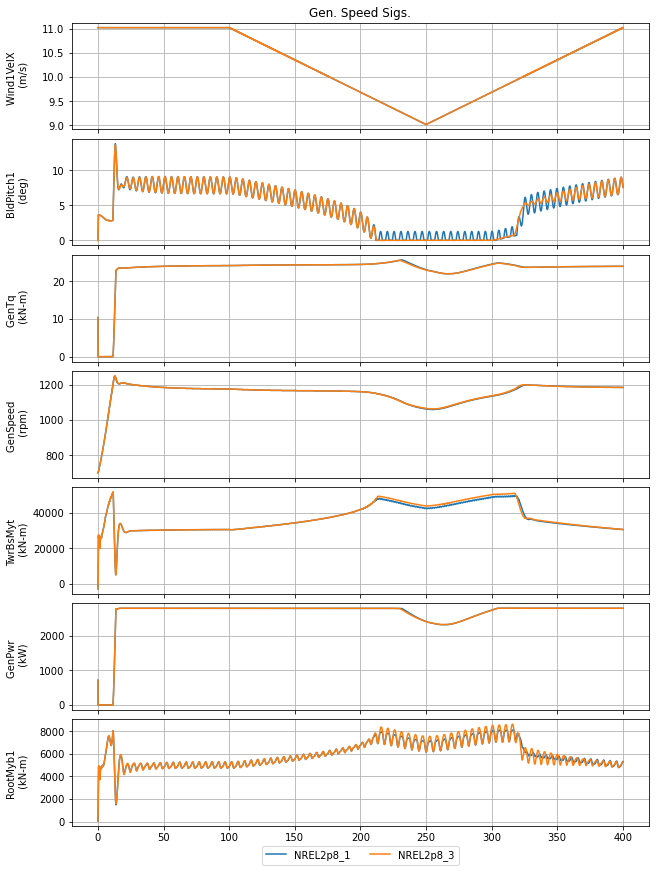

In [25]:
output_ext = '.out'
plt.rcParams["figure.figsize"] = [9,12]

ROSCO = True
ROSCO2 = True

#  Define Plot cases 
cases = {}
# cases['Gen. Speed Sigs.'] = ['Wind1VelX', 'BldPitch1', 'GenTq', 'GenSpeed','TwrBsMyt','GenPwr','RootMyb1']#,'PtfmPitch','PtfmYaw','NacYaw']
cases['Gen. Speed Sigs.'] = ['Wind1VelX','BldPitch1', 'GenTq', 'GenSpeed','TwrBsMyt','GenPwr','RootMyb1']#,'PtfmPitch','PtfmYaw','NacYaw']
# # cases['Debug'] = ['IPDefl1','OoPDefl1','Azimuth','RotTorq']#,'PtfmPitch','PtfmYaw','NacYaw']
# cases['Plt. Control Sigs.'] = ['Fl_PitCom', 'PC_MinPit']
# cases['Platform Motion'] = ['PtfmSurge', 'PtfmSway', 'PtfmHeave', 'PtfmPitch','PtfmRoll','PtfmYaw']
# # cases['Tower Loads'] = ['TwrBsFxt','TwrBsFyt', 'TwrBsFzt', 'TwrBsMxt', 'TwrBsMyt','TwrBsMzt']
# # cases['Rot Thrust'] = ['RtVAvgxh','BldPitch1','RotThrust']
# cases['IPC'] = ['PitCom','PitComAct']
# # cases['IPC'] = ['PtfmYaw','YawBrMzp','YawBrMyp']

# cases['Gen. Speed Sigs.'] = ['Wind1VelX', 'GenPwr', 'RotSpeed', 'GenSpeed', 'GenTq', 'BldPitch1','B1RootMyr'] #, 'PtfmPitch','PtfmYaw'] #,'PtfmPitch','PtfmYaw','NacYaw']
# cases['Rot. Pos'] = ['RotSpeed',('BldPitch1','BldPitch2','BldPitch3'),'GenTq','Azimuth']
# cases['Rotor Position'] = ['AzError','GenTqAz','Azimuth','AzUnwrapped','OL_Azimuth']
# cases['Aero'] = ["B1N3Alpha","B1N3Cd","B1N3Cl"]


op = output_processing.output_processing()
op_RO = output_processing.output_processing()
op_RO2 = output_processing.output_processing()



fast_out = []
fast_out = op.load_fast_out(outfiles, tmin=0)
if ROSCO:
    # Rosco outfiles
    r_outfiles = [out.split('.out')[0] + '.RO.dbg' for out in outfiles]
    rosco_out = op_RO.load_fast_out(r_outfiles, tmin=0)
    
    if ROSCO2:
        r_outfiles = [out.split('.out')[0] + '.RO.dbg2' for out in outfiles]
        rosco_out2 = op_RO2.load_fast_out(r_outfiles, tmin=0)
  
# Combine outputs
if ROSCO:
    comb_out = [None] * len(fast_out)
    for i, (r_out, f_out) in enumerate(zip(rosco_out,fast_out)):
        r_out.update(f_out)
        comb_out[i] = r_out
    if ROSCO2:
        for i, (r_out2, f_out) in enumerate(zip(rosco_out2,comb_out)):
            r_out2.update(f_out)
            comb_out[i] = r_out2
else:
    comb_out = fast_out

# comb_out
# if False:
#     comb_out[0]['meta']['name'] = 'Variable Bandwidth'

    
# Plot
fig, ax = op.plot_fast_out(comb_out,cases, showplot=True)

if False:  # Print!
    
    save_fig_dir = '/Users/dzalkind/Projects/CarbonTrust/Deliverables'
    for f in fig:
        f.savefig(os.path.join(save_fig_dir,'ts'+str(i_fig)))
        i_fig += 1

output_ext = '.out'
plt.rcParams["figure.figsize"] = [9,7]



In [70]:
fast_out[1]['PtfmHeave'].mean()

fast_out[0]['BldPitch1']

array([14.97, 15.  , 15.02, ..., 90.  , 90.  , 90.  ])

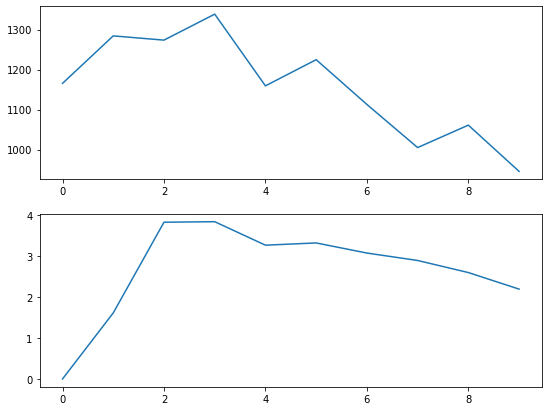

In [16]:

ind = comb_out[0]['Time'] > 120
a = np.array([co['RootMyb1'][ind].std() for co in comb_out])
b = np.array([co['BldPitch1'][ind].std() for co in comb_out])

fig, axs = plt.subplots(2,1)
axs[0].plot(a)
axs[1].plot(b)



In [33]:
18*20


360

,fq_0,psd_0,fq_1,psd_1,fq_2,psd_2
0,0.000000,1.671551e+10,0.000000,1.965097e+10,0.000000,1.081063e+10
1,0.000153,6.689014e+09,0.000153,7.170768e+09,0.000153,3.754186e+09
2,0.000305,3.124308e+07,0.000305,1.730212e+06,0.000305,4.290867e+06
3,0.000458,4.563406e+07,0.000458,6.438544e+06,0.000458,1.180544e+06
4,0.000610,3.262825e+07,0.000610,4.078779e+06,0.000610,7.362297e+05
...,...,...,...,...,...,...
262140,39.999390,9.375684e-05,39.999390,2.434349e-04,39.999390,1.894379e-04
262141,39.999542,1.289097e-05,39.999542,8.927871e-05,39.999542,3.235635e-04
262142,39.999695,5.578019e-05,39.999695,6.308301e-05,39.999695,2.832569e-05
262143,39.999847,6.688827e-05,39.999847,9.410833e-05,39.999847,4.557659e-05


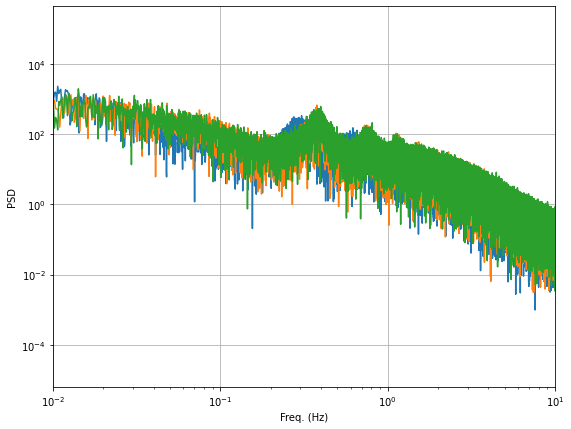

In [28]:
# plot thrust spectra

df = pd.DataFrame()

for i in range(3):
    fq, y, _ = spectral.fft_wrap(
                        fast_out[i]['Time'], fast_out[i]['RotThrust'], averaging='Welch', averaging_window='Hamming', output_type='psd')

    plt.plot(fq,np.sqrt(y))
    
    df['fq_'+str(i)] = fq
    df['psd_'+str(i)] = y
    
#     fq, y, _ = spectral.fft_wrap(
#                         fast_out[i]['Time'], fast_out[i]['RtVAvgxh'], averaging='Welch', averaging_window='Hamming', output_type='psd')

#     plt.plot(fq,np.sqrt(y))
    
#     fq, y, _ = spectral.fft_wrap(
#                     fast_out[i]['Time'], fast_out[i]['Wind1VelX'], averaging='Welch', averaging_window='Hamming', output_type='psd')

#     plt.plot(fq,np.sqrt(y))
    
    
    
    
    
plt.yscale('log')
plt.xscale('log')

plt.xlim([1e-2,10])
plt.grid('True')

plt.xlabel('Freq. (Hz)')
plt.ylabel('PSD')


df.to_pickle('/Users/dzalkind/Tools/RAFT/designs/rotors/thrust_psd.p')
df

(PtfmYaw,0) max period = 150.00041666666667
(PtfmYaw,1) max period = 85.71452380952381


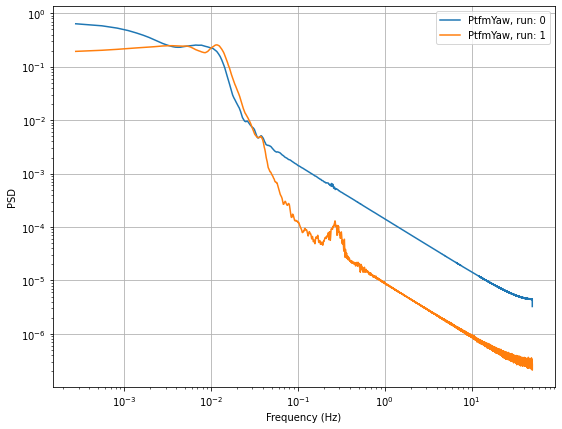

In [11]:
# Plot Spectral

_,_,max_periods = op.plot_spectral(fast_out,[('PtfmYaw',0),('PtfmYaw',1)],showplot=False,detrend=True)
yaw_fast = fast_out[0]['PtfmYaw']
std_yaw_fast = np.std(yaw_fast)
amp = std_yaw_fast * np.sqrt(2)




# save_yaml(dir_matrix, 'case_matrix.yaml', matrix_out_yaml)

# op